In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -uq '/content/gdrive/My Drive/chexpertdataset.zip'

In [0]:
import cv2
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
df_train = pd.read_csv('CheXpert-v1.0-small/train.csv')
df_val = pd.read_csv('CheXpert-v1.0-small/valid.csv')

In [4]:
# We shall make the train_test split later using ImageDataGenerator's parameter
df = pd.concat([df_train, df_val])
df = df.reset_index(drop=True)
display(df)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Image shape:  (320, 320, 3)


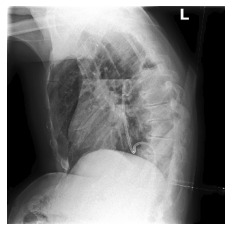

In [5]:
# Let's see an image
i = np.random.randint(len(df_train))
img = df_train.Path[i]
img = cv2.imread(img)
print('Image shape: ', img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

We will be only be focusing on 5 diseases for classification. Thus, we need to drop everything else.

In [6]:
df = df[[
  'Path', 
  'Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Pleural Effusion'
]]

display(df)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,NaN,NaN,NaN,NaN,NaN
1,CheXpert-v1.0-small/train/patient00002/study2/...,-1.0,-1.0,-1.0,-1.0,-1.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,NaN,NaN,-1.0,NaN,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,NaN,NaN,-1.0,NaN,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,0.0,0.0,0.0,0.0,0.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,0.0,0.0,0.0,0.0,0.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,0.0,1.0,0.0,1.0,0.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,0.0,0.0,0.0,0.0,0.0


In [0]:
# Code to select the frontal images only
#df_train = df_train[df_train['Frontal/Lateral'] == 'Frontal']
#df_train = df_train.reset_index(drop=True)
#display(df_train)

The data contains a *lot* of `NaN` and uncertain values as labels. We need to fix this.

In [8]:
# Handling the NaN values
df = df.fillna(0)
display(df)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,-1.0,-1.0,-1.0,-1.0,-1.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,-1.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,-1.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,0.0,0.0,0.0,0.0,0.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,0.0,0.0,0.0,0.0,0.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,0.0,1.0,0.0,1.0,0.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,0.0,0.0,0.0,0.0,0.0


In [9]:
# Handling the uncertain values
## Different policy for each feature:
u_ones = ['Atelectasis', 'Edema']
u_zeros = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']

df[u_ones]  = df[u_ones].replace(-1, 1)
df[u_zeros] = df[u_zeros].replace(-1, 0)

display(df)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,1.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,0.0,0.0,0.0,0.0,0.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,0.0,0.0,0.0,0.0,0.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,0.0,1.0,0.0,1.0,0.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,0.0,0.0,0.0,0.0,0.0


In [0]:
# String encoding for passing data into data-generators:
features = u_ones + u_zeros
features_column = []
for _, row in df.iterrows():
  feature_list = [feature for feature in features if row[feature] == 1]
  features_column.append(feature_list)

In [11]:
df['classes'] = features_column
display(df)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,classes
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.0,0.0,0.0,0.0,0.0,[]
1,CheXpert-v1.0-small/train/patient00002/study2/...,1.0,0.0,0.0,1.0,0.0,"[Atelectasis, Edema]"
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0,[]
3,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0,[]
4,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,0.0,0.0,1.0,0.0,[Edema]
...,...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,0.0,0.0,0.0,0.0,0.0,[]
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,0.0,0.0,0.0,0.0,0.0,[]
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,0.0,1.0,0.0,1.0,0.0,"[Edema, Cardiomegaly]"
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,0.0,0.0,0.0,0.0,0.0,[]


# The Data Generators

In [0]:
# Defining constants:
IMAGE_SIZE = 150
CLASSES = [ 
  'Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Pleural Effusion'
]

In [0]:
# Generating sample data:
sample_paths = df['Path'].sample(frac = 0.001).to_numpy()
X_sample = [np.array(cv2.imread(path, 1), dtype=float) for path in sample_paths]

In [0]:
X_0 = np.asarray(X_sample)
X_0 = X_sample[0]
shape = list(X_0.shape)
shape.insert(0, 1)
X_0 = X_0.reshape(tuple(shape))

In [0]:
from keras.preprocessing.image import ImageDataGenerator as IDG

datagen = IDG(
    rescale=1./255, 
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split = 0.1
)

datagen.fit(X_0)

test_datagen = IDG(rescale=1./255)

In [70]:
train_gen = datagen.flow_from_dataframe(
    dataframe = df,
    x_col = 'Path',
    y_col = 'classes',#columns,
    class_mode='categorical',#'raw',
    #validate_filenames = False,
    seed=42,
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size=32, 
    #classes = columns,
    subset = 'training'
)

Found 201284 validated image filenames belonging to 5 classes.


In [71]:
val_gen = datagen.flow_from_dataframe(
    dataframe = df,
    x_col = 'Path',
    y_col = 'classes', #columns,
    class_mode='categorical', #'raw',
    #validate_filenames = False,
    seed=42,
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size=32, 
    #classes = columns,
    subset = 'validation'
)

Found 22364 validated image filenames belonging to 5 classes.


# The Model

In [0]:
from keras.applications import Xception
# The convolutional base:
model_base = Xception(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [73]:
# Building on top of the base:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

model_base.trainable = False

# Unfreezing the last 10 layers:
for layer in model_base.layers[-10:]:
    layer.trainable = True

model = Sequential()
model.add(model_base) # Adding the base as a layer
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5125      
Total params: 73,296,429
Trainable params: 52,434,949
Non-trainable params: 20,861,480
_________________________________________________________________


In [0]:
from keras.metrics import AUC
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint(filepath='xception-weights.h5', verbose=1, save_best_only=True)
cb_list = [es, mc]

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc', AUC()]
)

In [0]:
# Training constants:
BATCH_SIZE = 32
TRAIN_STEPS = train_gen.n//BATCH_SIZE
VAL_STEPS   = val_gen.n//BATCH_SIZE
N_EPOCHS = 2

In [76]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=TRAIN_STEPS,
    epochs=N_EPOCHS,
    validation_data=val_gen,
    validation_steps=VAL_STEPS,
    callbacks = cb_list
)

Epoch 1/2
6290/6290 [==============================] - 2834s 451ms/step - loss: 0.5076 - acc: 0.7651 - auc_1: 0.7125 - val_loss: 0.4859 - val_acc: 0.7834 - val_auc_1: 0.7138

Epoch 00001: val_loss improved from inf to 0.48588, saving model to xception-weights.h5
Epoch 2/2
  98/6290 [..............................] - ETA: 44:59 - loss: 0.4872 - acc: 0.7667 - auc_1: 0.7259

KeyboardInterrupt: ignored